In [1]:
#install.packages("haven")
library(survey)
library(SDaA)
library(Hmisc)
library(haven)
library(ggplot2)
library(apyramid)
library(dplyr)
library(srvyr)
library(grid)
library(gridBase)
library(wesanderson)

Loading required package: grid

Loading required package: Matrix

Loading required package: survival

Warning message:
"package 'survival' was built under R version 3.6.3"

Attaching package: 'survey'


The following object is masked from 'package:graphics':

    dotchart


Warning message:
"package 'SDaA' was built under R version 3.6.3"
Warning message:
"package 'Hmisc' was built under R version 3.6.3"
Loading required package: lattice

Loading required package: Formula

Warning message:
"package 'Formula' was built under R version 3.6.3"
Loading required package: ggplot2


Attaching package: 'ggplot2'


The following object is masked from 'package:SDaA':

    seals



Attaching package: 'Hmisc'


The following object is masked from 'package:survey':

    deff


The following objects are masked from 'package:base':

    format.pval, units


Warning message:
"package 'haven' was built under R version 3.6.3"
Warning message:
"package 'apyramid' was built under R version 3.6.3"
Warning 

Comenzamos cargando las librerias y la base de datos

In [2]:
data <- as.data.frame(read_sav("2018.11.20_ENCAVI.2015.ocupacion.y.sf12 (1).sav"))


Y preparamos algunas variables para el análisis, también se carga el diseño muestral para el paquete survey

In [3]:
options(scipen=999)

data$Macrozona <- as.factor(data$Macrozona)
levels(data$Macrozona) <- c("Norte", "Centro","Sur", "Metropolitana")
data$Area <- as.factor(data$Area)
levels(data$Area) <- c("Urbano", "Rural")
data$P10_10<-as.factor(data$P10_10)
levels(data$P10_10)<-c("Menos de $77.000","$77.000 a $132.999","$133.000 a $214.999","$215.000 a $291.999",
                      "$292.000 a $378.999","$379.000 a $473.999","$474.000 a $598.999",
                      "$599.000 a $753.999","$754.000 a $1.015.999","$1.016.000 a $1.551.999",
                      "$1.552.000 o más","No sabe","No responde")
data$S2.enc<-as.factor(data$S2.enc)
data$EDUC_ENCUESTADO2<-as.factor(data$EDUC_ENCUESTADO2)
levels(data$EDUC_ENCUESTADO2)<-c("Educación Básica Completa o menos","Educación Media Incompleta","Educación Media Completa",
                                 "Educación Superior Completa o menos","No sabe o No responde")
names(data)[2]<-"Sexo"
data$Sexo<-as.factor(data$Sexo)
levels(data$Sexo)<-c("Hombre","Mujer")


ingreso<-c("Menos de $77.000","$77.000 a $132.999","$133.000 a $214.999","$215.000 a $291.999",
                      "$292.000 a $378.999","$379.000 a $473.999","$474.000 a $598.999",
                      "$599.000 a $753.999","$754.000 a $1.015.999","$1.016.000 a $1.551.999",
                      "$1.552.000 o más","No sabe","No responde")
macrozona<-c("Norte", "Centro","Sur", "Metropolitana")
region=c("Tarapacá","Antofagasta","Atacama","Coquimbo","Valparaíso","O’Higgins","Maule","Biobío","La Araucanía",
         "Los Lagos","Aysén","Magallanes y Antártica","Región Metropolitana","Los Ríos","Arica y Parinacota")
area<-c("Urbano", "Rural")
nivel_educ<-c("Nunca asistió","Jardín Infantil","Kinder/Prekinder","Educación Especial","Primaria o Preparatoria (sistema antiguo)","Educación Básica",
              "Humanidades (sistema antiguo)","Educación Media C-H","Técnica Comercial, Industrial o Normalista","Educación Media TP",
             "Técnico Nivel Superior","Profesional"," Postgrado","No sabe","No responde")
salud<-c("FONASA A","FONASA B","FONASA C","FONASA D","FONASA desconoce grupo","FFAA Y de Orden","ISAPRE",
         "OTRO","NINGUNO","No sabe","No responde")
salud<-as.factor(salud)


data$EDUC_JH2<-as.factor(data$EDUC_JH2)
levels(data$EDUC_JH2)<-c("Educación Media incompleta o menos","Educación Media completa","Educación Superior incompleta o más","No sabe o No responde")
######## DISEÑO MUESTRAL
complex<-svydesign(id=~VarUnit,weights=~wgt03, strata=~VarStrat, data=data,nest = TRUE)


## Pregunta 2

In [4]:
autocut <- function(x) {
  cut(x, breaks = pretty(x,15), right = TRUE, include.lowest = TRUE)
}
data$age_group <- autocut(as.integer(data$EDAD_ENCUESTADO))

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



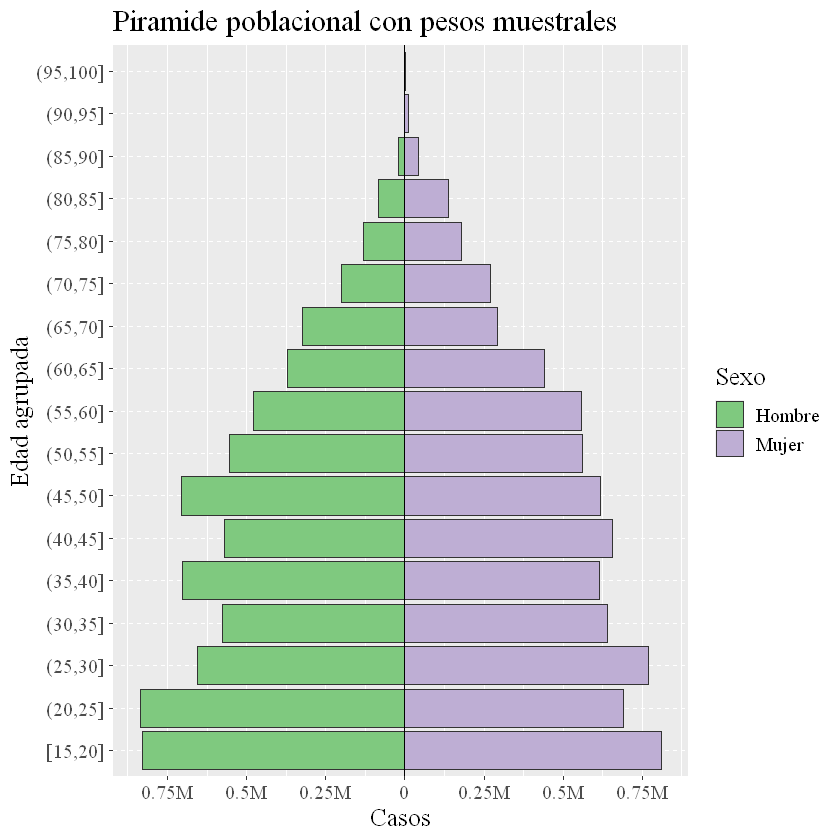

In [5]:
strata<-as_survey_design(data,
  ids = VarUnit,
  strata = VarStrat,
  nest = TRUE,
  weights = wgt03)

weighted<-age_pyramid(strata, age_group, split_by = Sexo , show_midpoint = FALSE) + scale_y_continuous(  breaks = c(-1000000,-750000,-500000,-250000,0,250000,500000,750000,1000000),
                                                                                          label = c("1M","0.75M","0.5M","0.25M","0","0.25M","0.5M","0.75M","1M")) 
weighted  +  theme(text = element_text(size = 15, family = "serif")) + 
  theme(legend.background = element_blank()) +
  labs(
    x       = "Edad agrupada",
    y       = "Casos",
    title   = "Piramide poblacional con pesos muestrales")


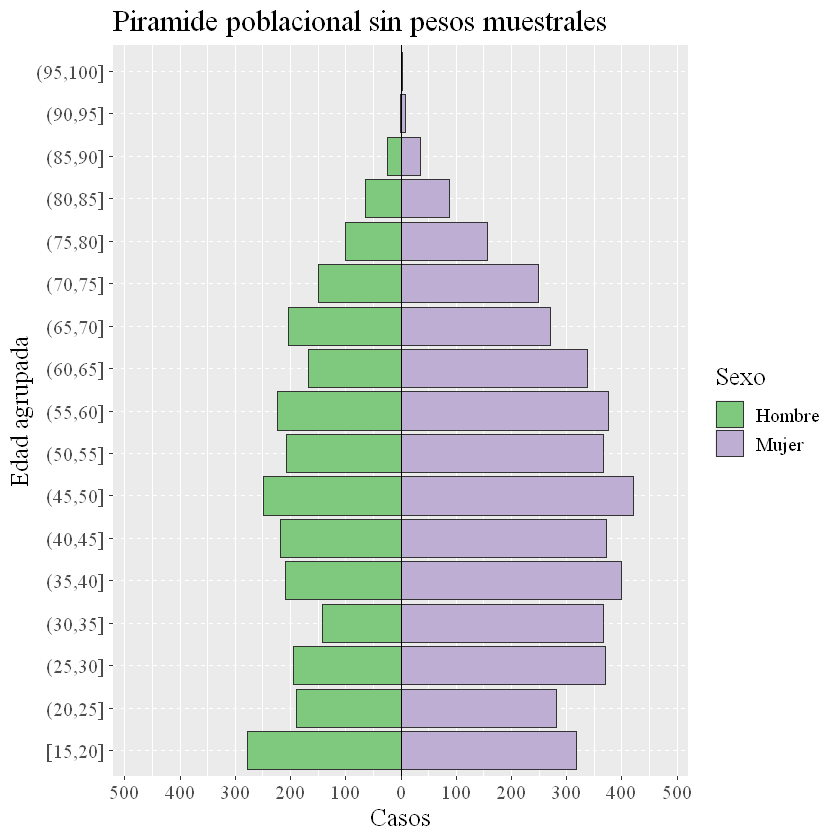

In [6]:
noweight<-age_pyramid(data, age_group, split_by = Sexo, show_midpoint = FALSE) 
noweight + theme(text = element_text(size = 15, family = "serif")) + 
  theme(legend.background = element_blank()) +
  labs(
    x       = "Edad agrupada",
    y       = "Casos",
    title   = "Piramide poblacional sin pesos muestrales")


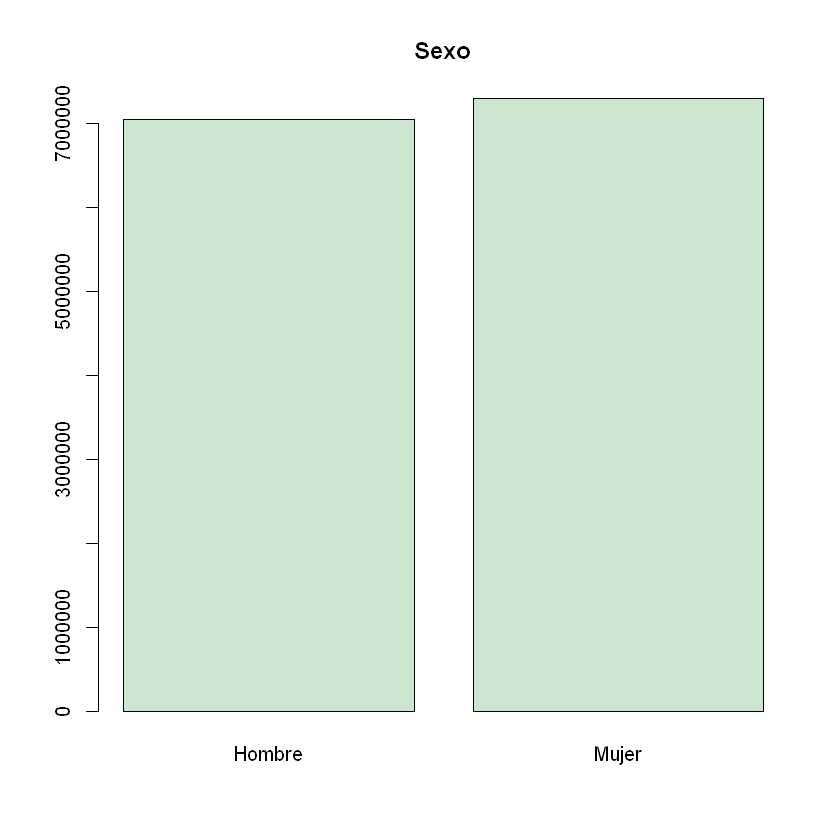

In [7]:
sexo<-svytotal(~Sexo,complex)
barplot(sexo, names.arg=c("Hombre","Mujer"), col="#CCE5CF", 
  main="Sexo")

In [8]:
svymean(~Sexo,complex)
confint(svymean(~Sexo,complex))

              mean     SE
SexoHombre 0.49114 0.0089
SexoMujer  0.50886 0.0089

,2.5 %,97.5 %
SexoHombre,0.4737261,0.5085491
SexoMujer,0.4914509,0.5262739


PueSe puede decir , que si hay más mujeres que hombres en Chile segun esta estimación, pero la diferencia no es significativa con un $\alpha = 0.05$

In [9]:
svymean(~EDAD_ENCUESTADO,complex)

                  mean     SE
EDAD_ENCUESTADO 42.296 0.4195

Don't know how to automatically pick scale for object of type haven_labelled/vctrs_vctr/double. Defaulting to continuous.



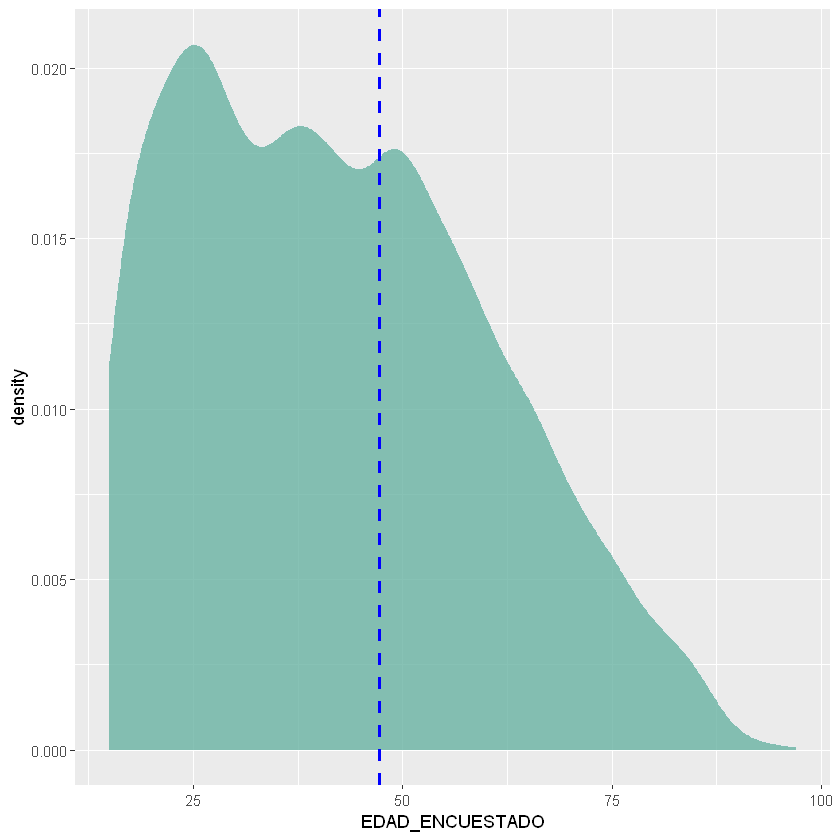

In [10]:
ggplot(data, aes(x = EDAD_ENCUESTADO,weight = wgt03))+ geom_density(fill="#69b3a2", color="#e9ecef", alpha=0.8) + geom_vline(aes(xintercept=mean(EDAD_ENCUESTADO)),
            color="blue", linetype="dashed", size=1)

Don't know how to automatically pick scale for object of type haven_labelled/vctrs_vctr/double. Defaulting to continuous.



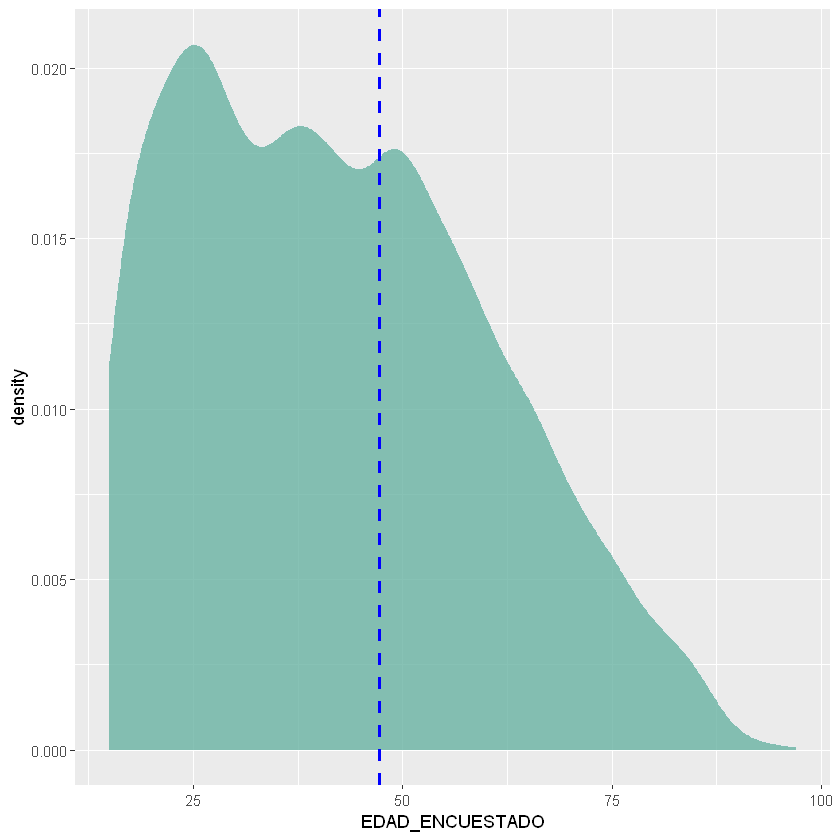

In [11]:
edad<-data.frame(svytable(~EDAD_ENCUESTADO,complex))



# Creamos un gráfico
ggplot(data, aes(x = EDAD_ENCUESTADO,weight = wgt03))+ geom_density(fill="#69b3a2", color="#e9ecef", alpha=0.8) + geom_vline(aes(xintercept=mean(EDAD_ENCUESTADO)),
            color="blue", linetype="dashed", size=1)



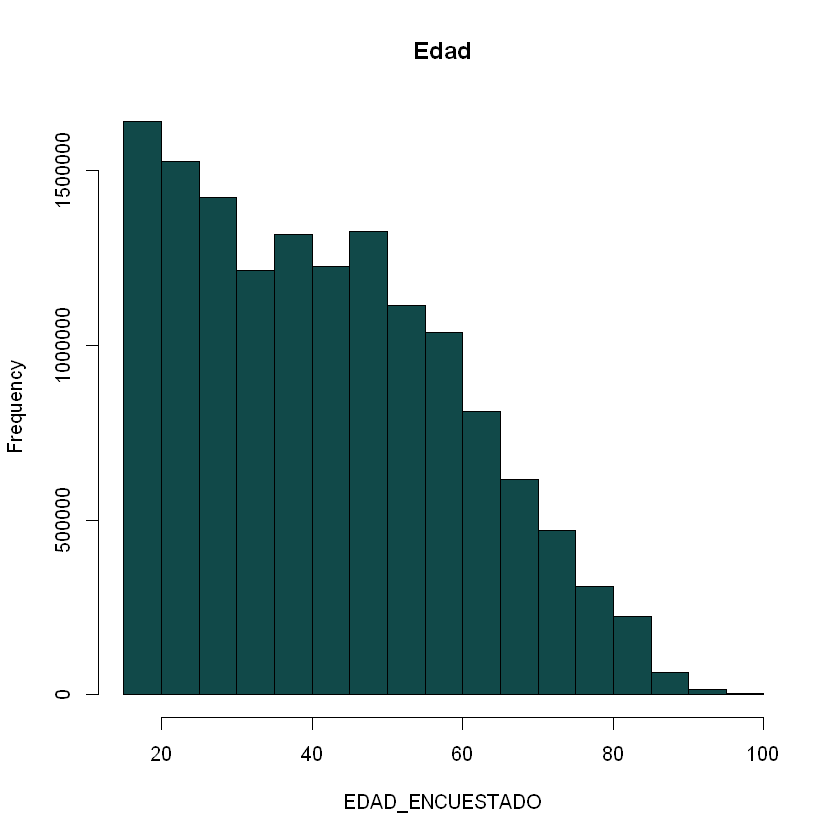

In [12]:
svyhist(~EDAD_ENCUESTADO, complex, freq=TRUE,main="Edad", col="#114949")

Podemos ver que el tramo entre 20 y 30 es donde se acumula la mayor cantidad de personas

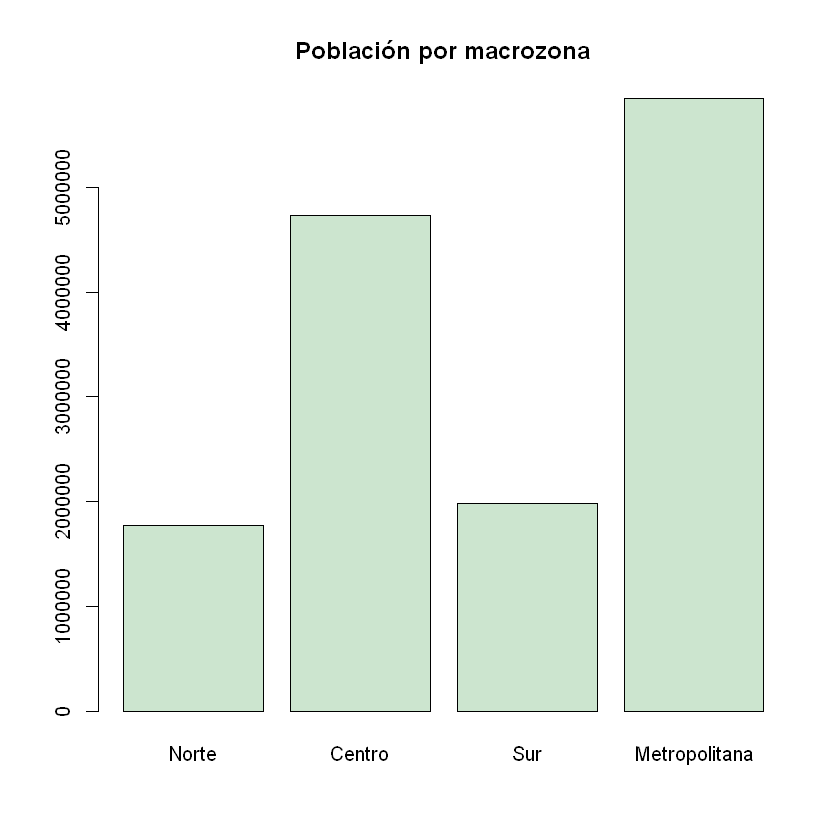

In [13]:
b<-svytotal(~Macrozona, complex, probability = FALSE)
barplot(b, names.arg=c("Norte","Centro","Sur","Metropolitana"), col="#CCE5CF", 
  main="Población por macrozona")

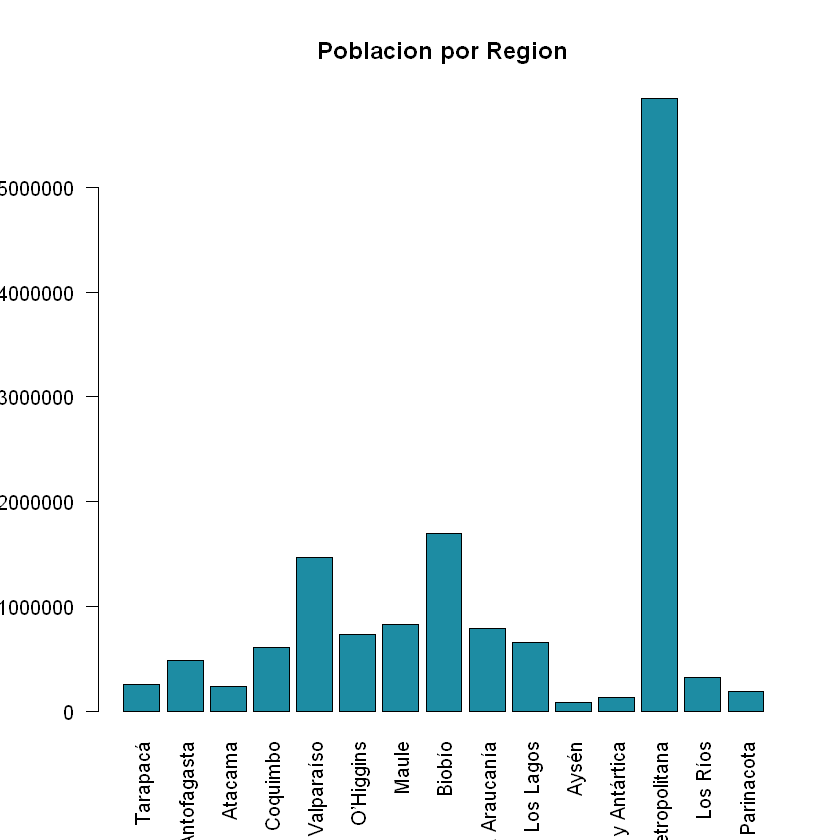

In [14]:
v<-svytable(~Region,complex)
barplot(v,names.arg=region, col="#1D8CA3",main="Poblacion por Region",las=2)

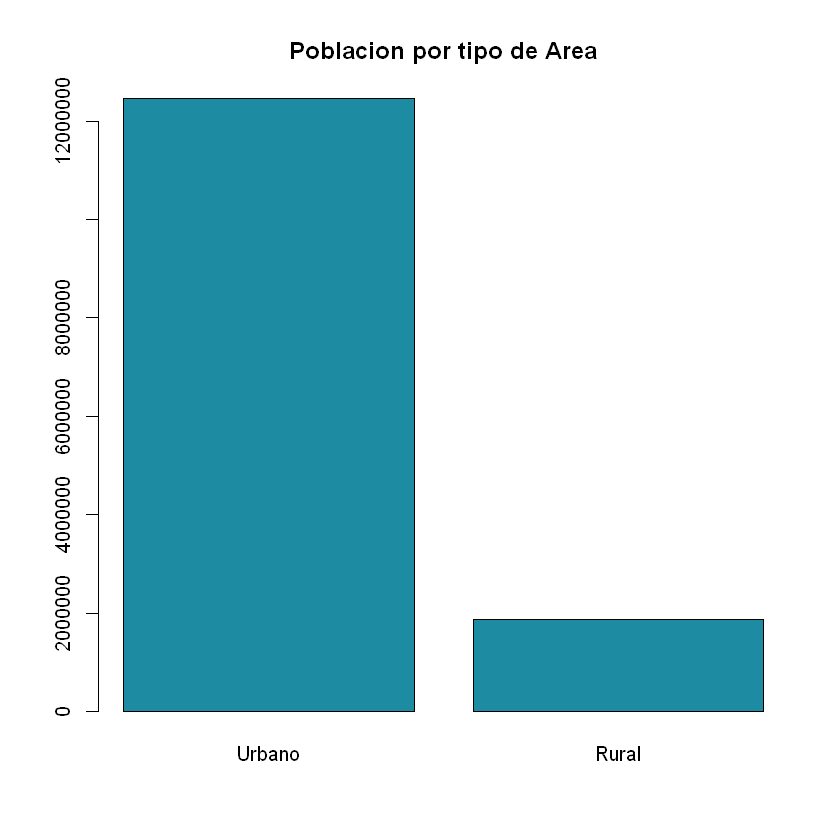

In [15]:
c<-svytotal(~Area, complex, probability = FALSE)
barplot(c, names.arg=c("Urbano","Rural"), col="#1D8CA3", 
  main="Poblacion por tipo de Area")

## Pregunta 3

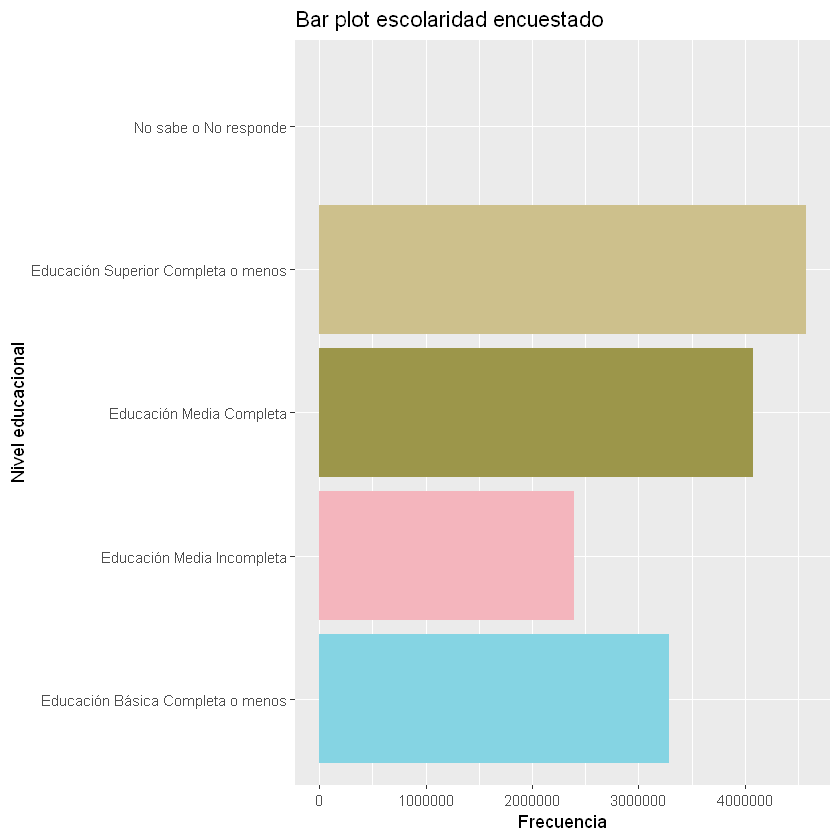

In [16]:
table<-data.frame(svytable(~EDUC_ENCUESTADO2,complex))


ggplot(table, aes(EDUC_ENCUESTADO2, Freq,  fill=EDUC_ENCUESTADO2)) + 
  geom_bar(stat = "identity" )+  coord_flip() +  ggtitle("Bar plot escolaridad encuestado") +
  xlab("Nivel educacional") + ylab("Frecuencia") + theme(legend.position="none") + scale_fill_manual(values = wes_palette('Moonrise3', n = 5))

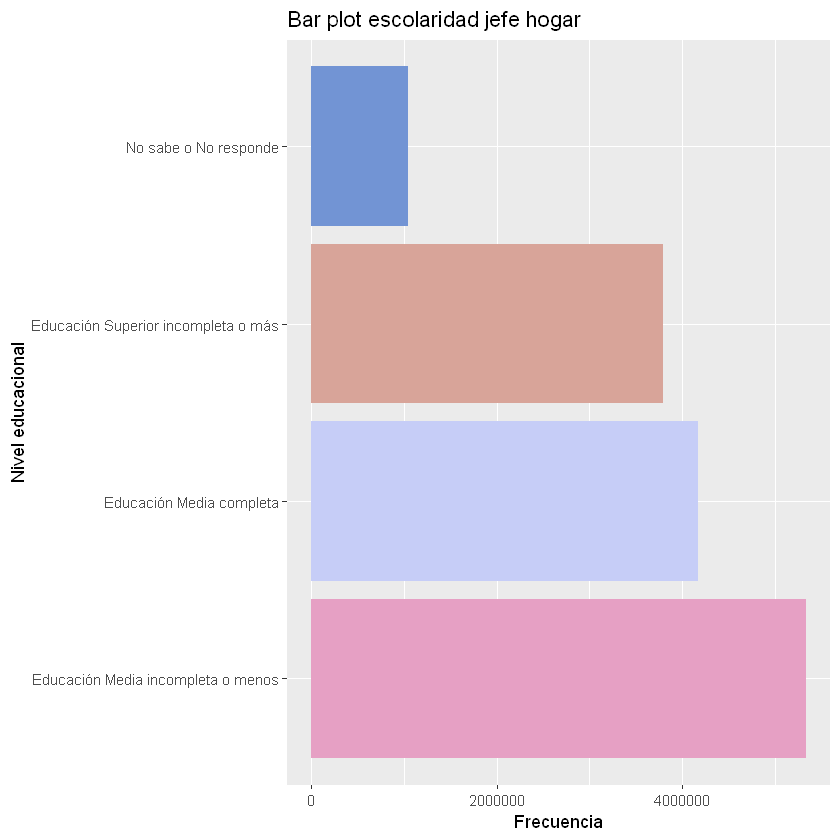

In [17]:
tot<-data.frame(svytable(~EDUC_JH2,complex))

ggplot(tot, aes(EDUC_JH2, Freq,  fill=EDUC_JH2)) + 
  geom_bar(stat = "identity" ) +  coord_flip() +  ggtitle("Bar plot escolaridad jefe hogar") +
  xlab("Nivel educacional") + ylab("Frecuencia") +  theme(legend.position="none")+ scale_fill_manual(values = wes_palette('GrandBudapest2', n = 4))


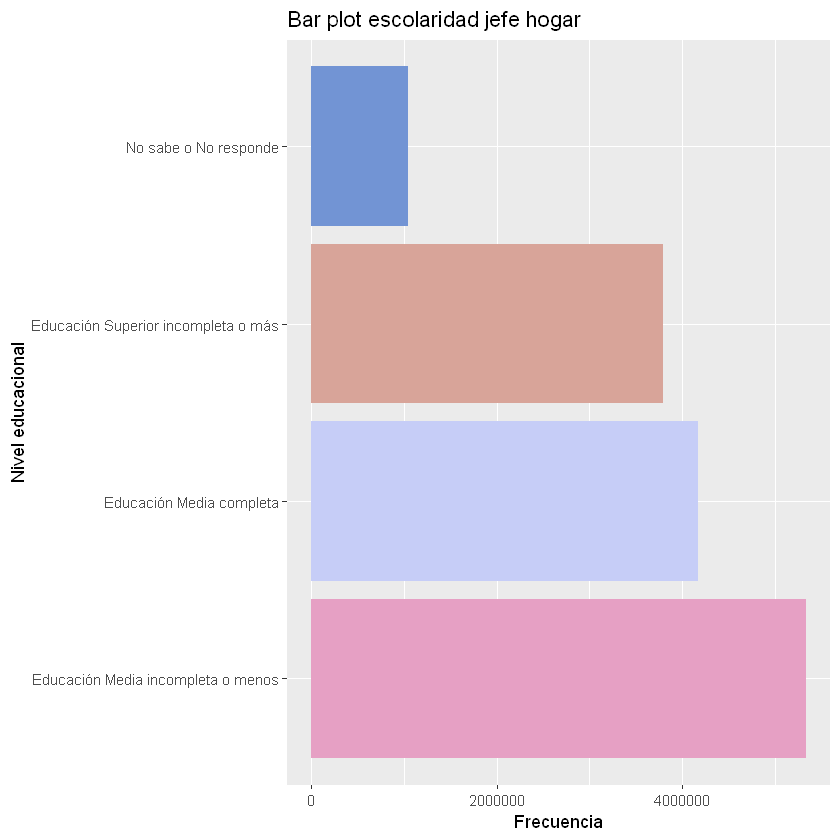

In [18]:

ggplot(tot, aes(EDUC_JH2, Freq,  fill=EDUC_JH2)) + 
  geom_bar(stat = "identity" ) +  coord_flip() +  ggtitle("Bar plot escolaridad jefe hogar") +
  xlab("Nivel educacional") + ylab("Frecuencia") +  theme(legend.position="none")+ scale_fill_manual(values = wes_palette('GrandBudapest2', n = 4))


## Pregunta 4

In [19]:
palette <- c(wes_palettes$GrandBudapest2,wes_palettes$Moonrise3,wes_palettes$Royal2,wes_palettes$Chevalier1)
palette

[1] "#E6A0C4" "#C6CDF7" "#D8A499" "#7294D4" "#85D4E3" "#F4B5BD" "#9C964A"
 [8] "#CDC08C" "#FAD77B" "#9A8822" "#F5CDB4" "#F8AFA8" "#FDDDA0" "#74A089"
[15] "#446455" "#FDD262" "#D3DDDC" "#C7B19C"

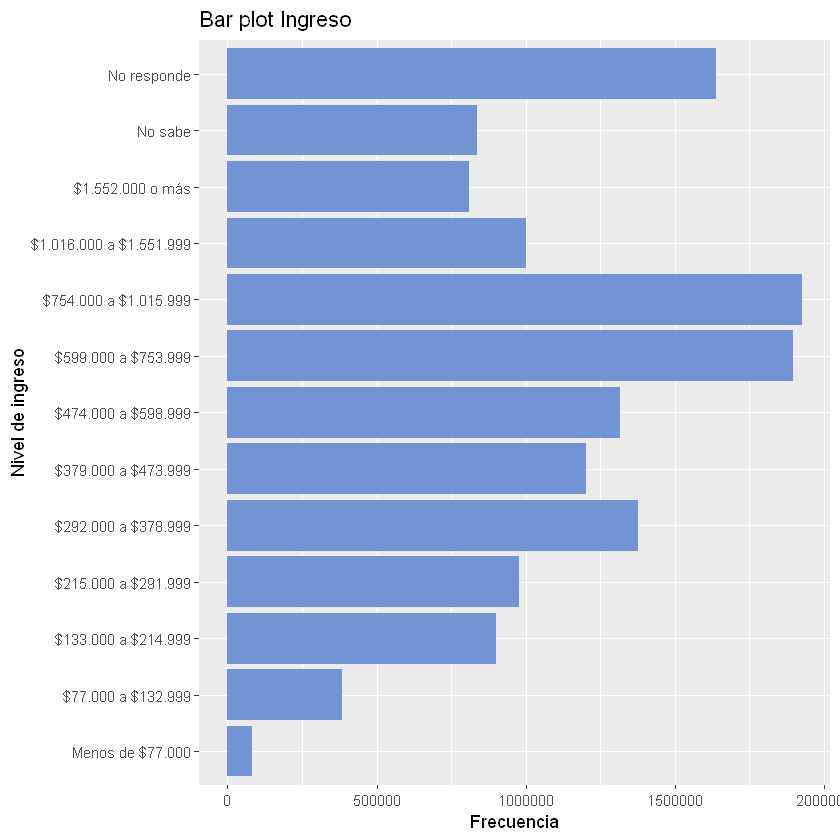

In [20]:
liquido<-data.frame(svytable(~P10_10,complex))
ggplot(liquido, aes(x =P10_10, y = Freq)) + geom_bar(stat = "identity",position = "dodge",fill = '#7294D4')+  coord_flip()  + ggtitle("Bar plot Ingreso") +
  xlab("Nivel de ingreso") + ylab("Frecuencia") 

In [21]:
macro<-c(rep(macrozona,each=13))
macrozona_ingreso<-data.frame(Macrozona=macro,Ingreso=as.factor(ingreso),svytotal(~interaction(P10_10,Macrozona), complex))
rownames(macrozona_ingreso)<- NULL

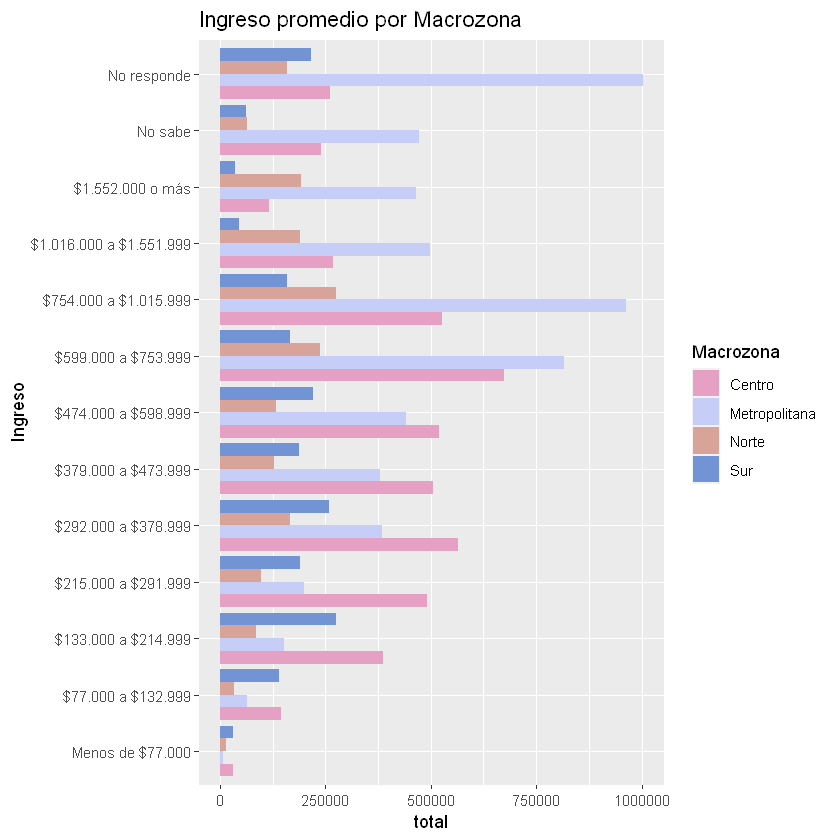

In [22]:
ggplot(macrozona_ingreso, aes(x = Ingreso, y = total, fill = Macrozona)) + geom_bar(stat = "identity",position = "dodge")+  coord_flip() +
  labs(title = "Ingreso promedio por Macrozona") + 
  scale_x_discrete(limits = ingreso) +scale_fill_manual(values=palette)

In [23]:
region_ingreso<-data.frame(Region=c(rep(region, each=13)),Ingreso=as.factor(ingreso),svytotal(~interaction(P10_10,Region), complex))
rownames(region_ingreso)<- NULL

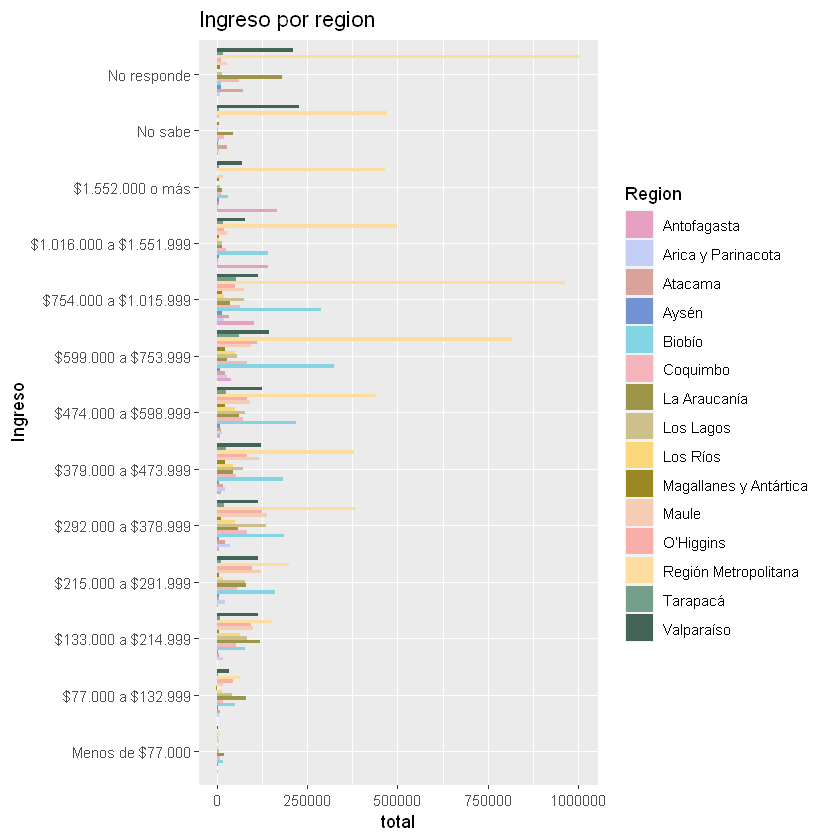

In [24]:
ggplot(region_ingreso, aes(x = Ingreso, y = total, fill = Region)) + geom_bar(stat = "identity",position = "dodge")+  coord_flip() +
  labs(title = "Ingreso por region") + scale_x_discrete(limits = ingreso) +scale_fill_manual(values=palette)



In [25]:
area_ingreso<-data.frame(area=c(rep(area, each=13)),Ingreso=as.factor(ingreso),svytotal(~interaction(P10_10,Area), complex))
rownames(area_ingreso)<- NULL

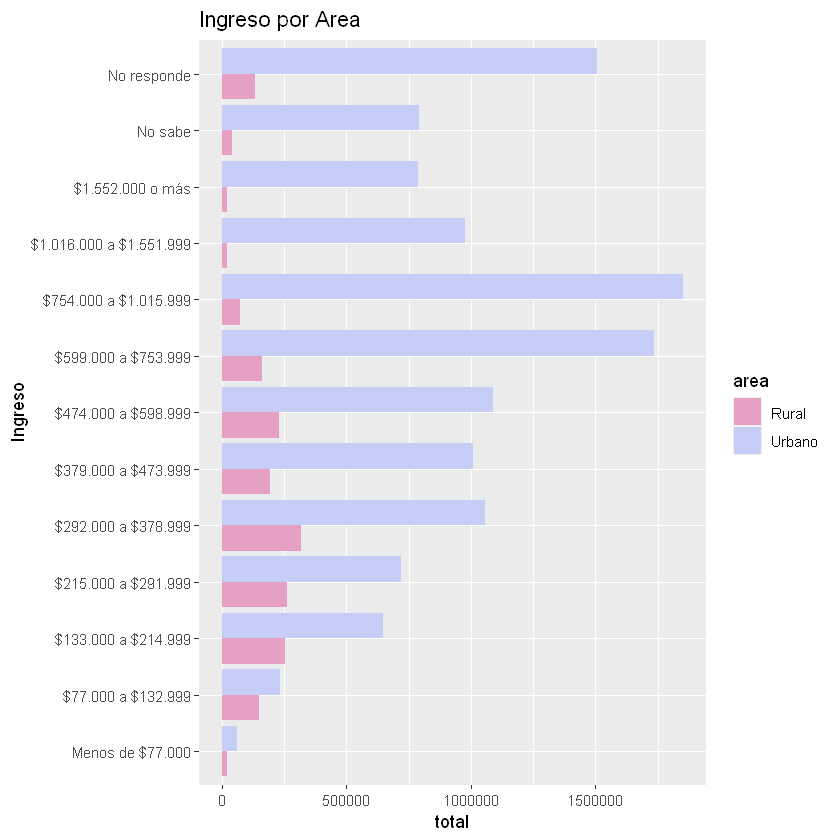

In [26]:
ggplot(area_ingreso, aes(x = Ingreso, y = total, fill = area)) + geom_bar(stat = "identity",position = "dodge")+  coord_flip() +
  labs(title = "Ingreso por Area") + 
  scale_x_discrete(limits = ingreso) +scale_fill_manual(values=palette)


In [27]:
nivel<-c("Educación Media incompleta o menos","Educación Media completa","Educación Superior incompleta o más","No sabe o No responde")
educ_ingreso<-data.frame("Nivel Educacional"=c(rep(nivel,each=13)),Ingreso=as.factor(rep(ingreso,4)),svytotal(~interaction(P10_10,EDUC_JH2), complex))
rownames(educ_ingreso)<- NULL
colnames(educ_ingreso)<-c("Nivel_Educacional","Ingreso","Total","SE")
educ_ingreso

Nivel_Educacional,Ingreso,Total,SE
<fct>,<fct>,<dbl>,<dbl>
Educación Media incompleta o menos,Menos de $77.000,65470.287,14140.730
Educación Media incompleta o menos,$77.000 a $132.999,286018.477,31575.150
Educación Media incompleta o menos,$133.000 a $214.999,637313.643,48371.968
Educación Media incompleta o menos,$215.000 a $291.999,633447.464,48541.692
Educación Media incompleta o menos,$292.000 a $378.999,773709.280,75086.376
Educación Media incompleta o menos,$379.000 a $473.999,532051.546,39015.698
Educación Media incompleta o menos,$474.000 a $598.999,553034.982,50123.142
Educación Media incompleta o menos,$599.000 a $753.999,583837.551,65119.345
Educación Media incompleta o menos,$754.000 a $1.015.999,382366.303,54164.584


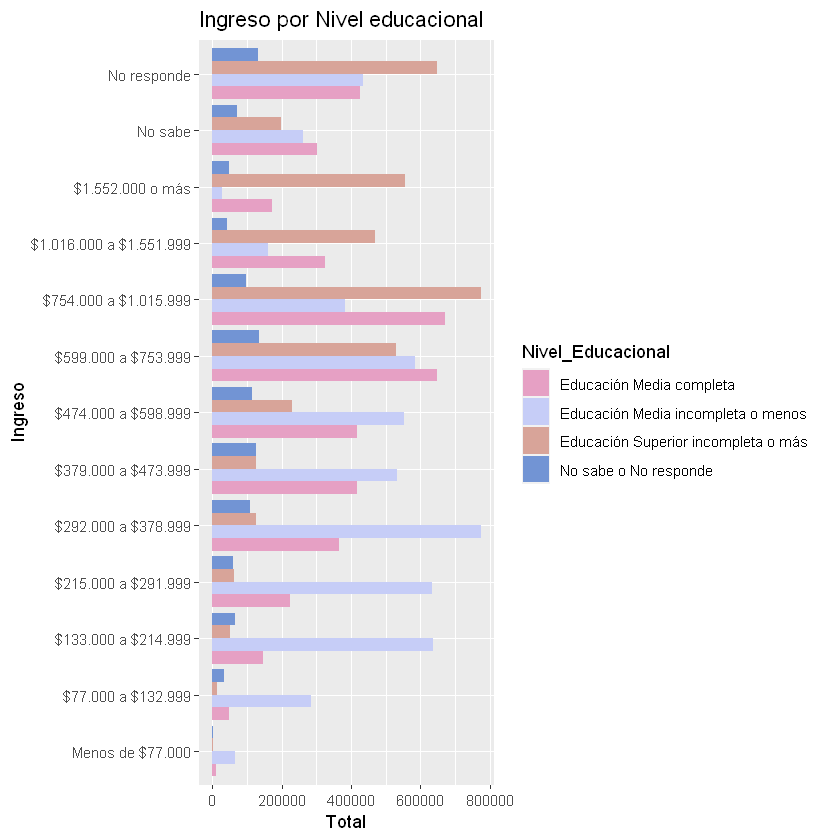

In [28]:
ggplot(educ_ingreso, aes(x = Ingreso, y = Total, fill = Nivel_Educacional)) + geom_bar(stat = "identity",position = "dodge")+  coord_flip() +
  labs(title = "Ingreso por Nivel educacional") + 
  scale_x_discrete(limits = ingreso) +scale_fill_manual(values=palette)


In [29]:
nivel_educ_ingreso=data.frame("Nivel Educacional"=c(rep(nivel_educ,each=13)),Ingreso=as.factor(ingreso),svytotal(~interaction(P10_10,S2.enc), complex))
rownames(nivel_educ_ingreso)<- NULL
colnames(nivel_educ_ingreso)<-c("Nivel_Educacional","Ingreso","Total","SE")

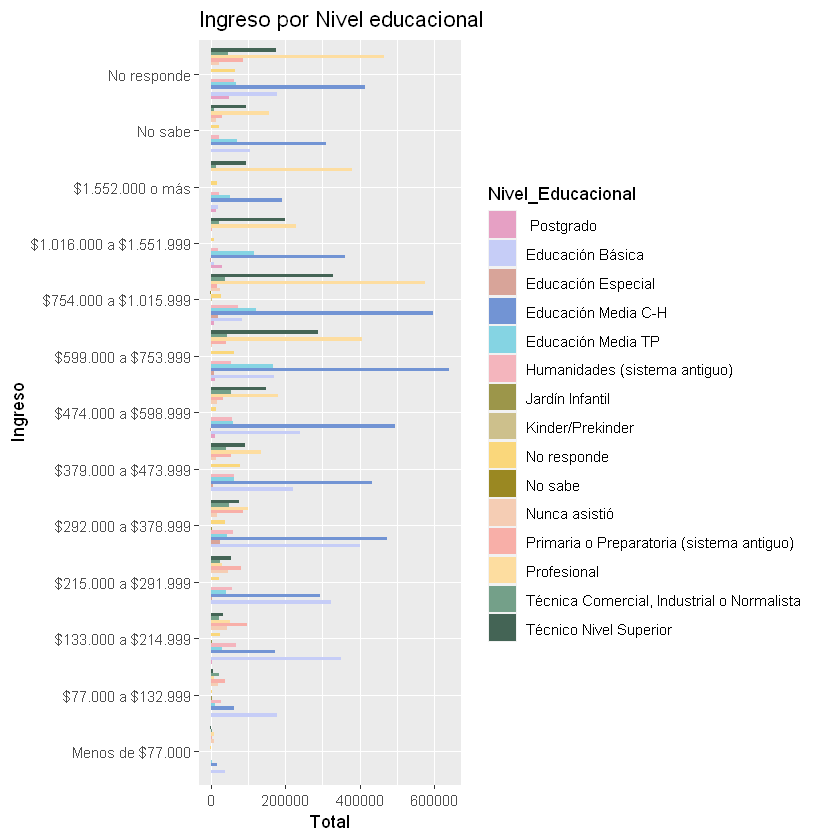

In [30]:
ggplot(nivel_educ_ingreso, aes(x = Ingreso, y = Total, fill = Nivel_Educacional)) + geom_bar(stat = "identity",position = "dodge")+  coord_flip() +
  labs(title = "Ingreso por Nivel educacional") + 
  scale_x_discrete(limits = ingreso) +scale_fill_manual(values=palette)

## Pregunta 5

In [31]:
sisalud<-data.frame(salud,svytable(~S1.enc,complex))
sisalud

salud,S1.enc,Freq
<fct>,<fct>,<dbl>
FONASA A,1,3321060.885
FONASA B,2,3352793.064
FONASA C,3,2011513.924
FONASA D,4,1456264.033
FONASA desconoce grupo,5,562879.167
FFAA Y de Orden,6,215377.215
ISAPRE,7,2448628.466
OTRO,8,126228.948
NINGUNO,9,421776.393


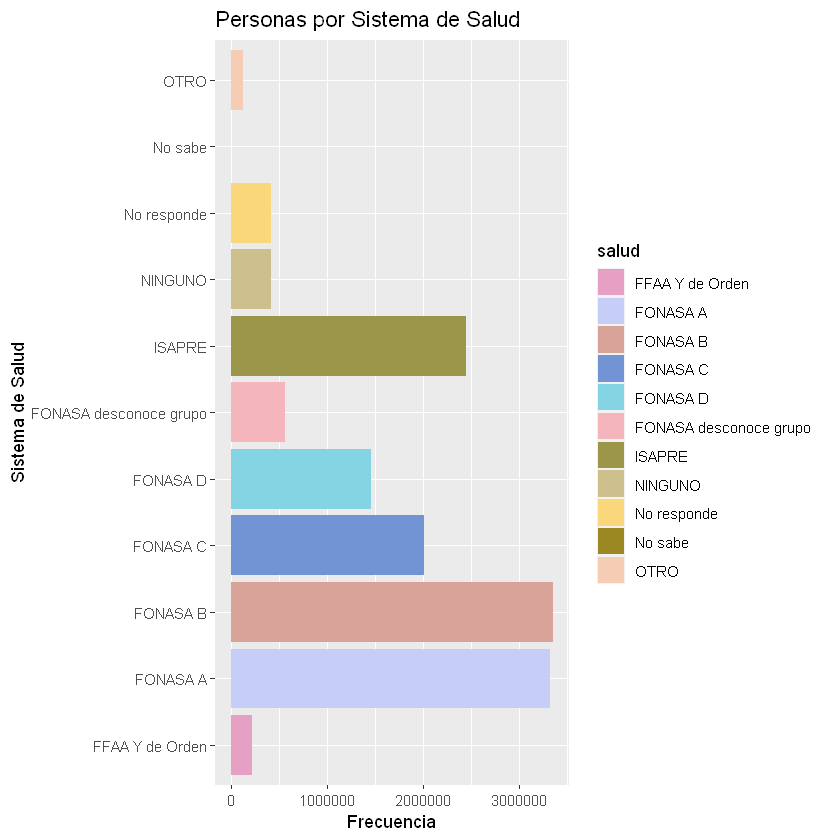

In [32]:

ggplot(sisalud, aes(x=salud,y=Freq,fill=salud))+geom_bar(stat="identity",position = "dodge") + labs(title= "Personas por Sistema de Salud") + coord_flip()+
xlab("Sistema de Salud") + ylab("Frecuencia")  +scale_fill_manual(values=palette) 
# Cerramos el dispositivo


In [33]:
salud_macro<-data.frame(Macrozona=rep(macrozona,each=11),"Sistema de salud"= rep(salud,4),svytable(~interaction(S1.enc,Macrozona), complex))
salud_macro$interaction.S1.enc..Macrozona.<-NULL
colnames(salud_macro)=c("Macrozona","Sistema_de_salud","Freq")


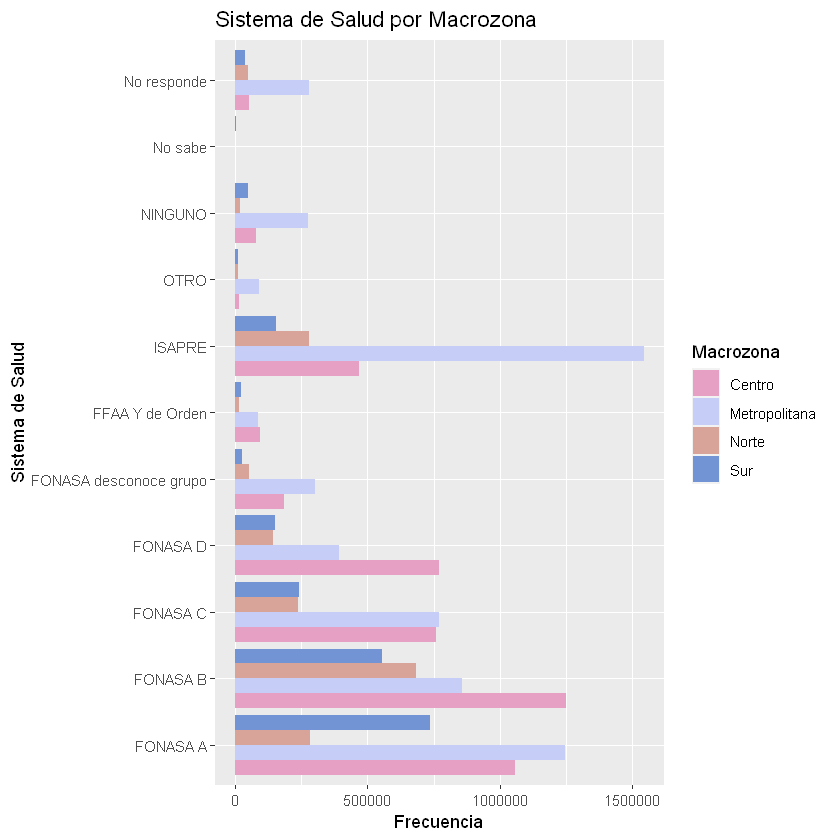

In [34]:
ggplot(salud_macro, aes(x = Sistema_de_salud, y = Freq, fill = 	Macrozona)) + 
  geom_bar(stat = "identity",position = "dodge")+  coord_flip() +
  labs(title = "Sistema de Salud por Macrozona") + 
  scale_x_discrete(limits = salud) +scale_fill_manual(values=palette) +  xlab("Sistema de Salud") + ylab("Frecuencia") 

In [35]:
salud_region=data.frame(Region=rep(region,each=11),"Sistema de salud"=rep(salud,15),svytable(~interaction(S1.enc,Region), complex))
salud_region$interaction.S1.enc..Region.<-NULL
colnames(salud_region)<-c("Region","Sistema_de_salud","Freq")

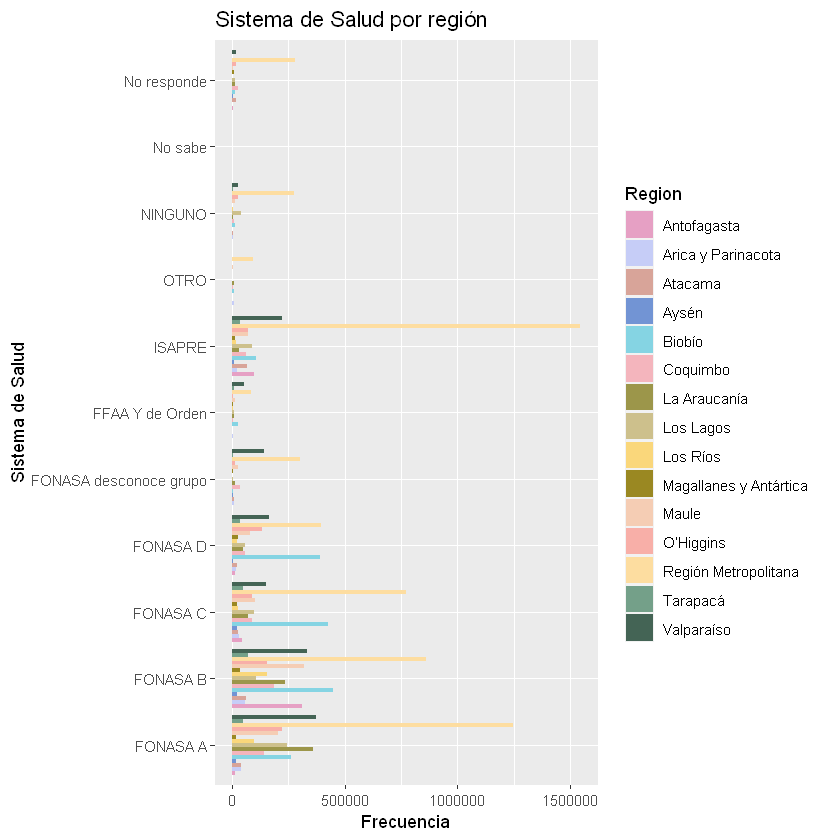

In [36]:
ggplot(salud_region, aes(x = Sistema_de_salud, y = Freq, fill = Region)) + 
  geom_bar(stat = "identity",position = "dodge")+  coord_flip() +
  labs(title = "Sistema de Salud por región") + 
  scale_x_discrete(limits =salud)+scale_fill_manual(values=palette)  +  xlab("Sistema de Salud") + ylab("Frecuencia") 

In [37]:
salud_area=data.frame(Region=rep(area,each=11),"Sistema de salud"=rep(salud,2),svytable(~interaction(S1.enc,Area), complex))
salud_area$interaction.S1.enc..Area.<-NULL

colnames(salud_area)<-c("Area","Sistema_de_salud","Freq")

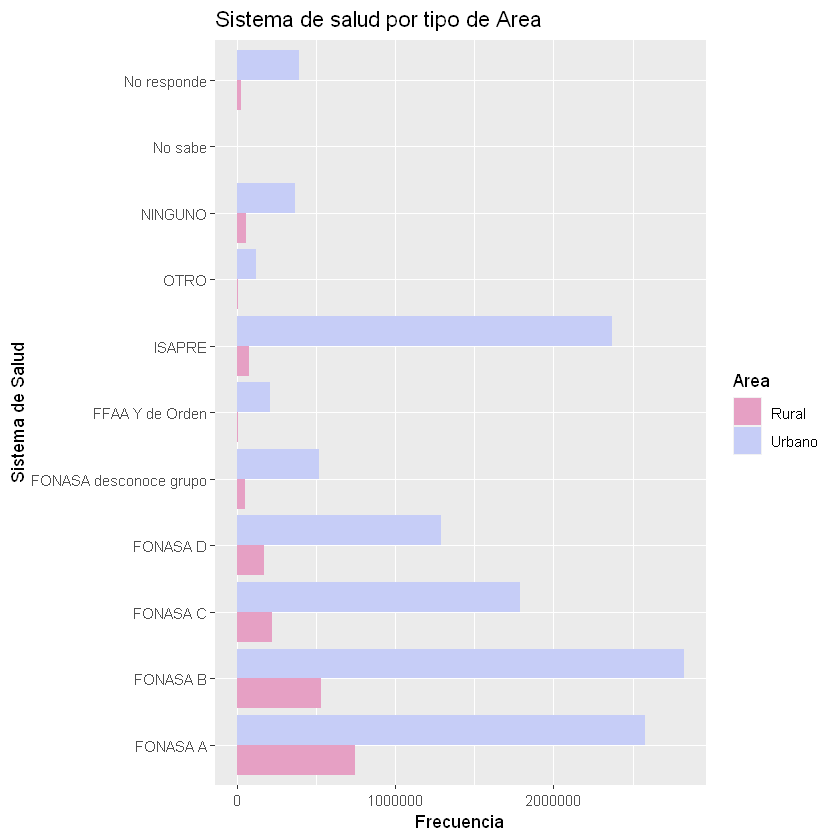

In [38]:
ggplot(salud_area, aes(x = Sistema_de_salud, y = Freq, fill = Area)) + 
  geom_bar(stat = "identity",position = "dodge")+  coord_flip() +
  labs(title = "Sistema de salud por tipo de Area") + 
  scale_x_discrete(limits =salud)+scale_fill_manual(values=palette) +  xlab("Sistema de Salud") + ylab("Frecuencia") 




In [39]:
educ_ingreso<-data.frame("Nivel Educacional"=c(rep(nivel,each=11)),"Sistema_de_salud"=rep(salud,4),svytable(~interaction(S1.enc,EDUC_JH2), complex))
educ_ingreso$interaction.S1.enc..EDUC_JH2.<-NULL

colnames(educ_ingreso)<-c("Nivel_Educacional","Sistema_de_Salud","Total")
educ_ingreso

Nivel_Educacional,Sistema_de_Salud,Total
<fct>,<fct>,<dbl>
Educación Media incompleta o menos,FONASA A,2019348.340
Educación Media incompleta o menos,FONASA B,1479446.889
Educación Media incompleta o menos,FONASA C,640113.587
Educación Media incompleta o menos,FONASA D,319288.772
Educación Media incompleta o menos,FONASA desconoce grupo,201403.749
Educación Media incompleta o menos,FFAA Y de Orden,53616.880
Educación Media incompleta o menos,ISAPRE,235154.770
Educación Media incompleta o menos,OTRO,77107.169
Educación Media incompleta o menos,NINGUNO,212180.014


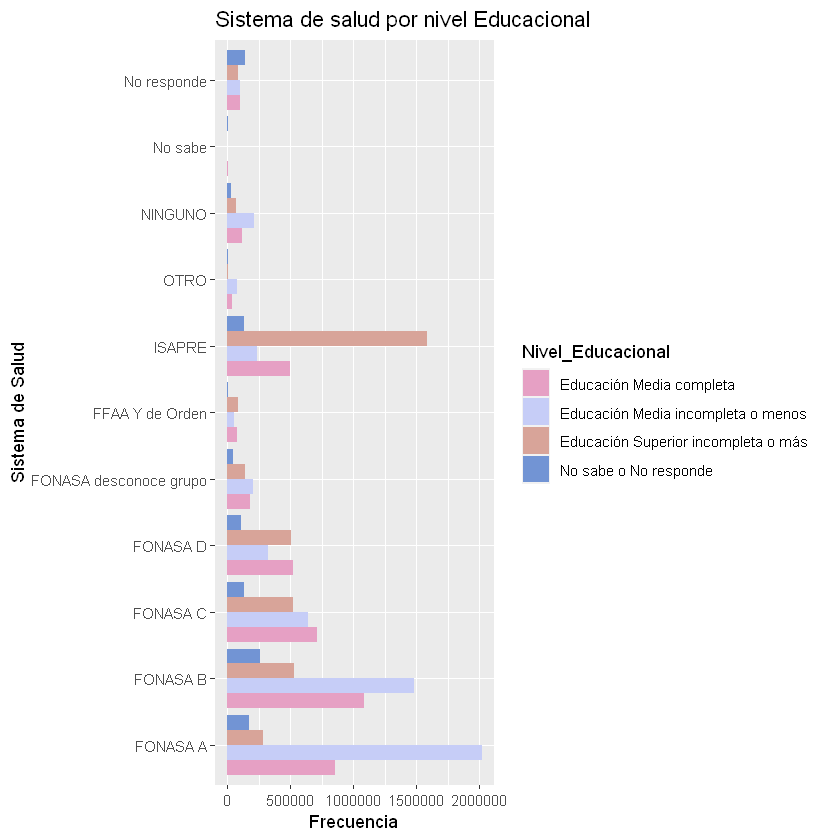

In [40]:
ggplot(educ_ingreso, aes(x = Sistema_de_Salud, y = Total, fill = Nivel_Educacional)) + 
  geom_bar(stat = "identity",position = "dodge")+  coord_flip() +
  labs(title = "Si")  +  labs(title = "Sistema de salud por nivel Educacional") + 
  scale_x_discrete(limits =salud)+scale_fill_manual(values=palette) +  xlab("Sistema de Salud") + ylab("Frecuencia") 



## Pregunta 6

In [41]:
fumadores<-svymean(~P6_14 ==1,complex)
fumadores
confint(fumadores)

                  mean     SE
P6_14 == 1FALSE 0.6989 0.0083
P6_14 == 1TRUE  0.3011 0.0083

,2.5 %,97.5 %
P6_14 == 1FALSE,0.6827064,0.7150972
P6_14 == 1TRUE,0.2849028,0.3172936


In [42]:
regional<-svytotal(~interaction(Region , P6_14 ==1), complex)
fumadores_region<-regional[16:30]
proporcion_region<-regional[16:30]/(regional[16:30]+regional[1:15])
total_region<-regional[16:30]+regional[1:15]
fumadores<-data.frame(region,fumadores_region,total_region,proporcion_region)
rownames(fumadores)<-NULL
fumadores

region,fumadores_region,total_region,proporcion_region
<fct>,<dbl>,<dbl>,<dbl>
Tarapacá,100422.01,255168,0.3935525
Antofagasta,97117.76,482565,0.2012532
Atacama,44631.46,241262,0.1849917
Coquimbo,189887.29,608615,0.3119990
Valparaíso,464958.71,1471962,0.3158768
O’Higgins,171285.54,730108,0.2346030
Maule,150568.22,833828,0.1805747
Biobío,511275.86,1695343,0.3015766
La Araucanía,187986.08,786773,0.2389331


In [43]:
fumador <- c("No","Si")
propregion<-data.frame(rep(fumador,each=15),rep(region,2),regional)
rownames(propregion)<-NULL
colnames(propregion)<-c("fuma","region","total","SE")
propregion

fuma,region,total,SE
<fct>,<fct>,<dbl>,<dbl>
No,Tarapacá,154745.99,9161.3417
No,Antofagasta,385447.24,33884.4673
No,Atacama,196630.54,294.6799
No,Coquimbo,418727.71,27620.0204
No,Valparaíso,1007003.29,78008.8663
No,O’Higgins,558822.46,74366.5961
No,Maule,683259.77,58468.1697
No,Biobío,1184067.14,78647.3964
No,La Araucanía,598786.92,29775.2902


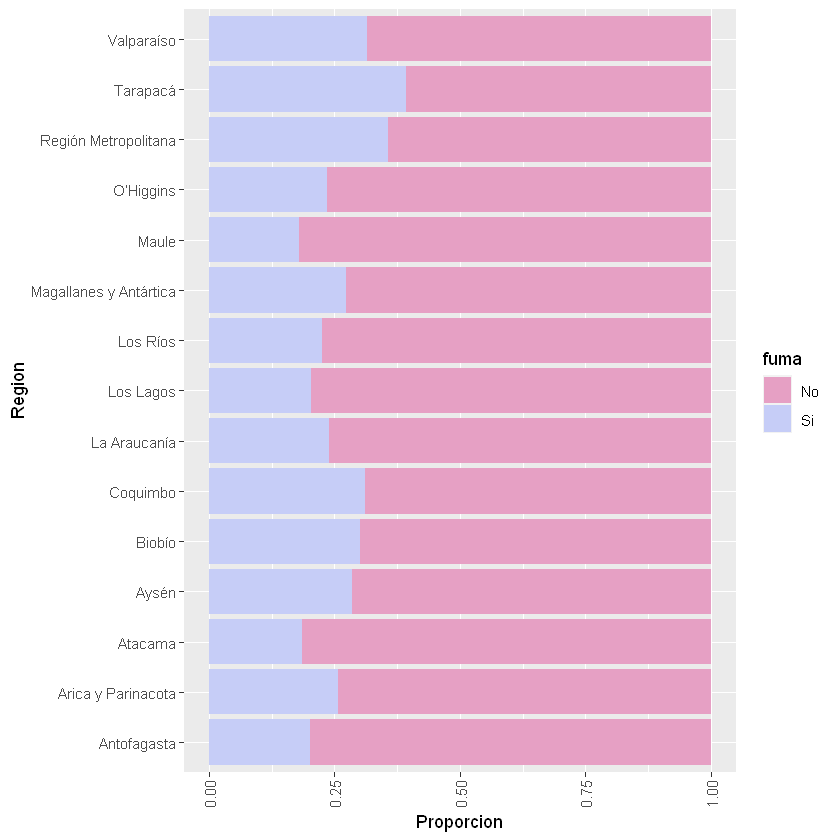

In [44]:
ggplot(propregion, aes(x = region, y = total, fill = fuma)) +
  geom_col(position = "fill") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
scale_fill_manual(values=palette) +  xlab("Region") + ylab("Proporcion") +coord_flip()



In [45]:
fum_educ<-svytotal(~interaction(EDUC_ENCUESTADO2,P6_14==1),complex)

lvls<-c("Educación Básica Completa o menos","Educación Media Incompleta","Educación Media Completa",
                                 "Educación Superior Completa o menos","No sabe o No responde")

propeduc<-data.frame(rep(fumador,each=5),rep(lvls,2),fum_educ)
rownames(propeduc)<-NULL
colnames(propeduc)<-c("fuma","nivel_educacion","total","SE")
propeduc

fuma,nivel_educacion,total,SE
<fct>,<fct>,<dbl>,<dbl>
No,Educación Básica Completa o menos,2610710.9,114754.45
No,Educación Media Incompleta,1774664.5,87236.35
No,Educación Media Completa,2660989.8,97366.60
No,Educación Superior Completa o menos,2975826.9,106133.27
No,No sabe o No responde,0.0,0.00
Si,Educación Básica Completa o menos,681769.6,54623.02
Si,Educación Media Incompleta,623103.6,52923.47
Si,Educación Media Completa,1413025.4,79427.27
Si,Educación Superior Completa o menos,1599824.3,137180.19


Warning message:
"Removed 2 rows containing missing values (geom_col)."


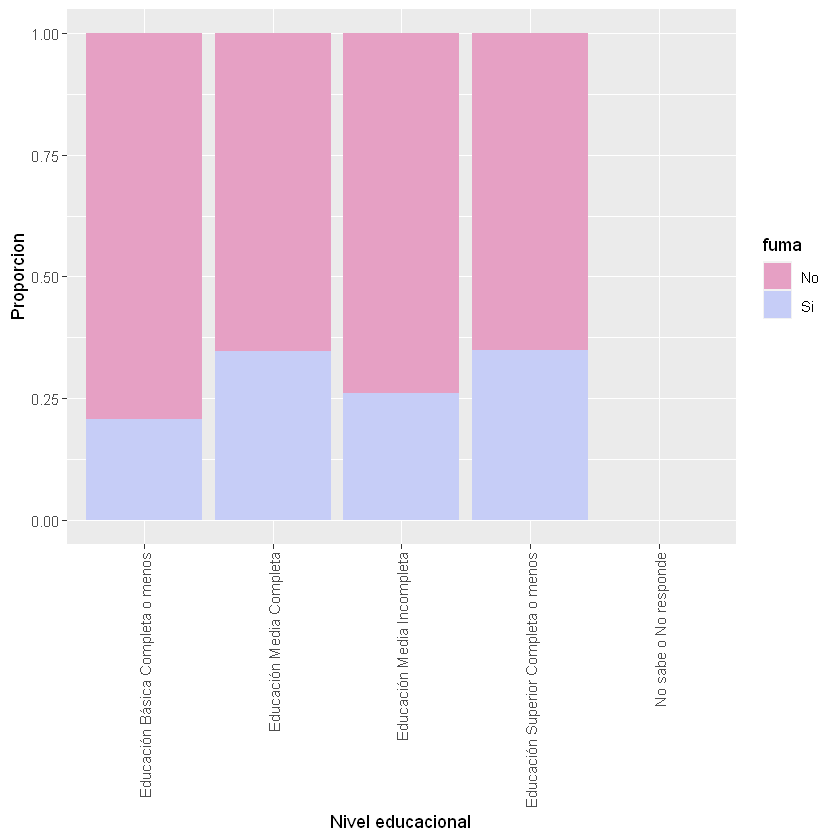

In [46]:
ggplot(propeduc, aes(x = nivel_educacion, y = total, fill = fuma)) +
  geom_col(position = "fill") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + scale_fill_manual(values=palette) +  xlab("Nivel educacional") + ylab("Proporcion")



In [47]:
fum_educ<-svytotal(~interaction(S2.enc,P6_14==1),complex)
prop<-fum_educ[16:30]/(fum_educ[1:15]+fum_educ[16:30])
total_region<-c(fum_educ[1:15]+fum_educ[16:30])
fumadores<-fum_educ[16:30]
fumadores_niveleduc<-data.frame(nivel_educ,fumadores,total_region,prop)
rownames(fumadores_niveleduc)<-NULL
fumadores_niveleduc

nivel_educ,fumadores,total_region,prop
<fct>,<dbl>,<dbl>,<dbl>
Nunca asistió,29188.580,229738.946,0.12705108
Jardín Infantil,3404.513,10915.699,0.31189147
Kinder/Prekinder,4039.460,4978.055,0.81145358
Educación Especial,15657.666,67255.964,0.23280710
Primaria o Preparatoria (sistema antiguo),50461.476,567573.477,0.08890739
Educación Básica,559131.495,2317531.069,0.24126170
Humanidades (sistema antiguo),105147.925,588164.687,0.17877293
Educación Media C-H,1445584.686,4462126.509,0.32396766
"Técnica Comercial, Industrial o Normalista",108116.796,394464.244,0.27408516
